In [2626]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2627]:
data = pd.read_csv(
    r"C:\Users\hosse\OneDrive\Desktop\AI Source\practice Dataset\دیتا ست های تمرینی\Automobile.csv"
)

In [2628]:
df = pd.DataFrame(data=data)

In [2629]:
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [2630]:
df.shape

(398, 9)

In [2631]:
df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [2632]:
df.describe(include="all")

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398
unique,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,ford pinto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa
freq,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249
mean,NaN,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN
std,NaN,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN
min,NaN,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN
25%,NaN,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN
50%,NaN,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN
75%,NaN,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN


In [2633]:
for col in df.columns:
    print(f"unique values in {col}:\n {df[col].unique()}")
    print("_" * 80)

unique values in name:
 ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota cor

In [2634]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [2635]:
df.drop(columns=["name"], inplace=True)

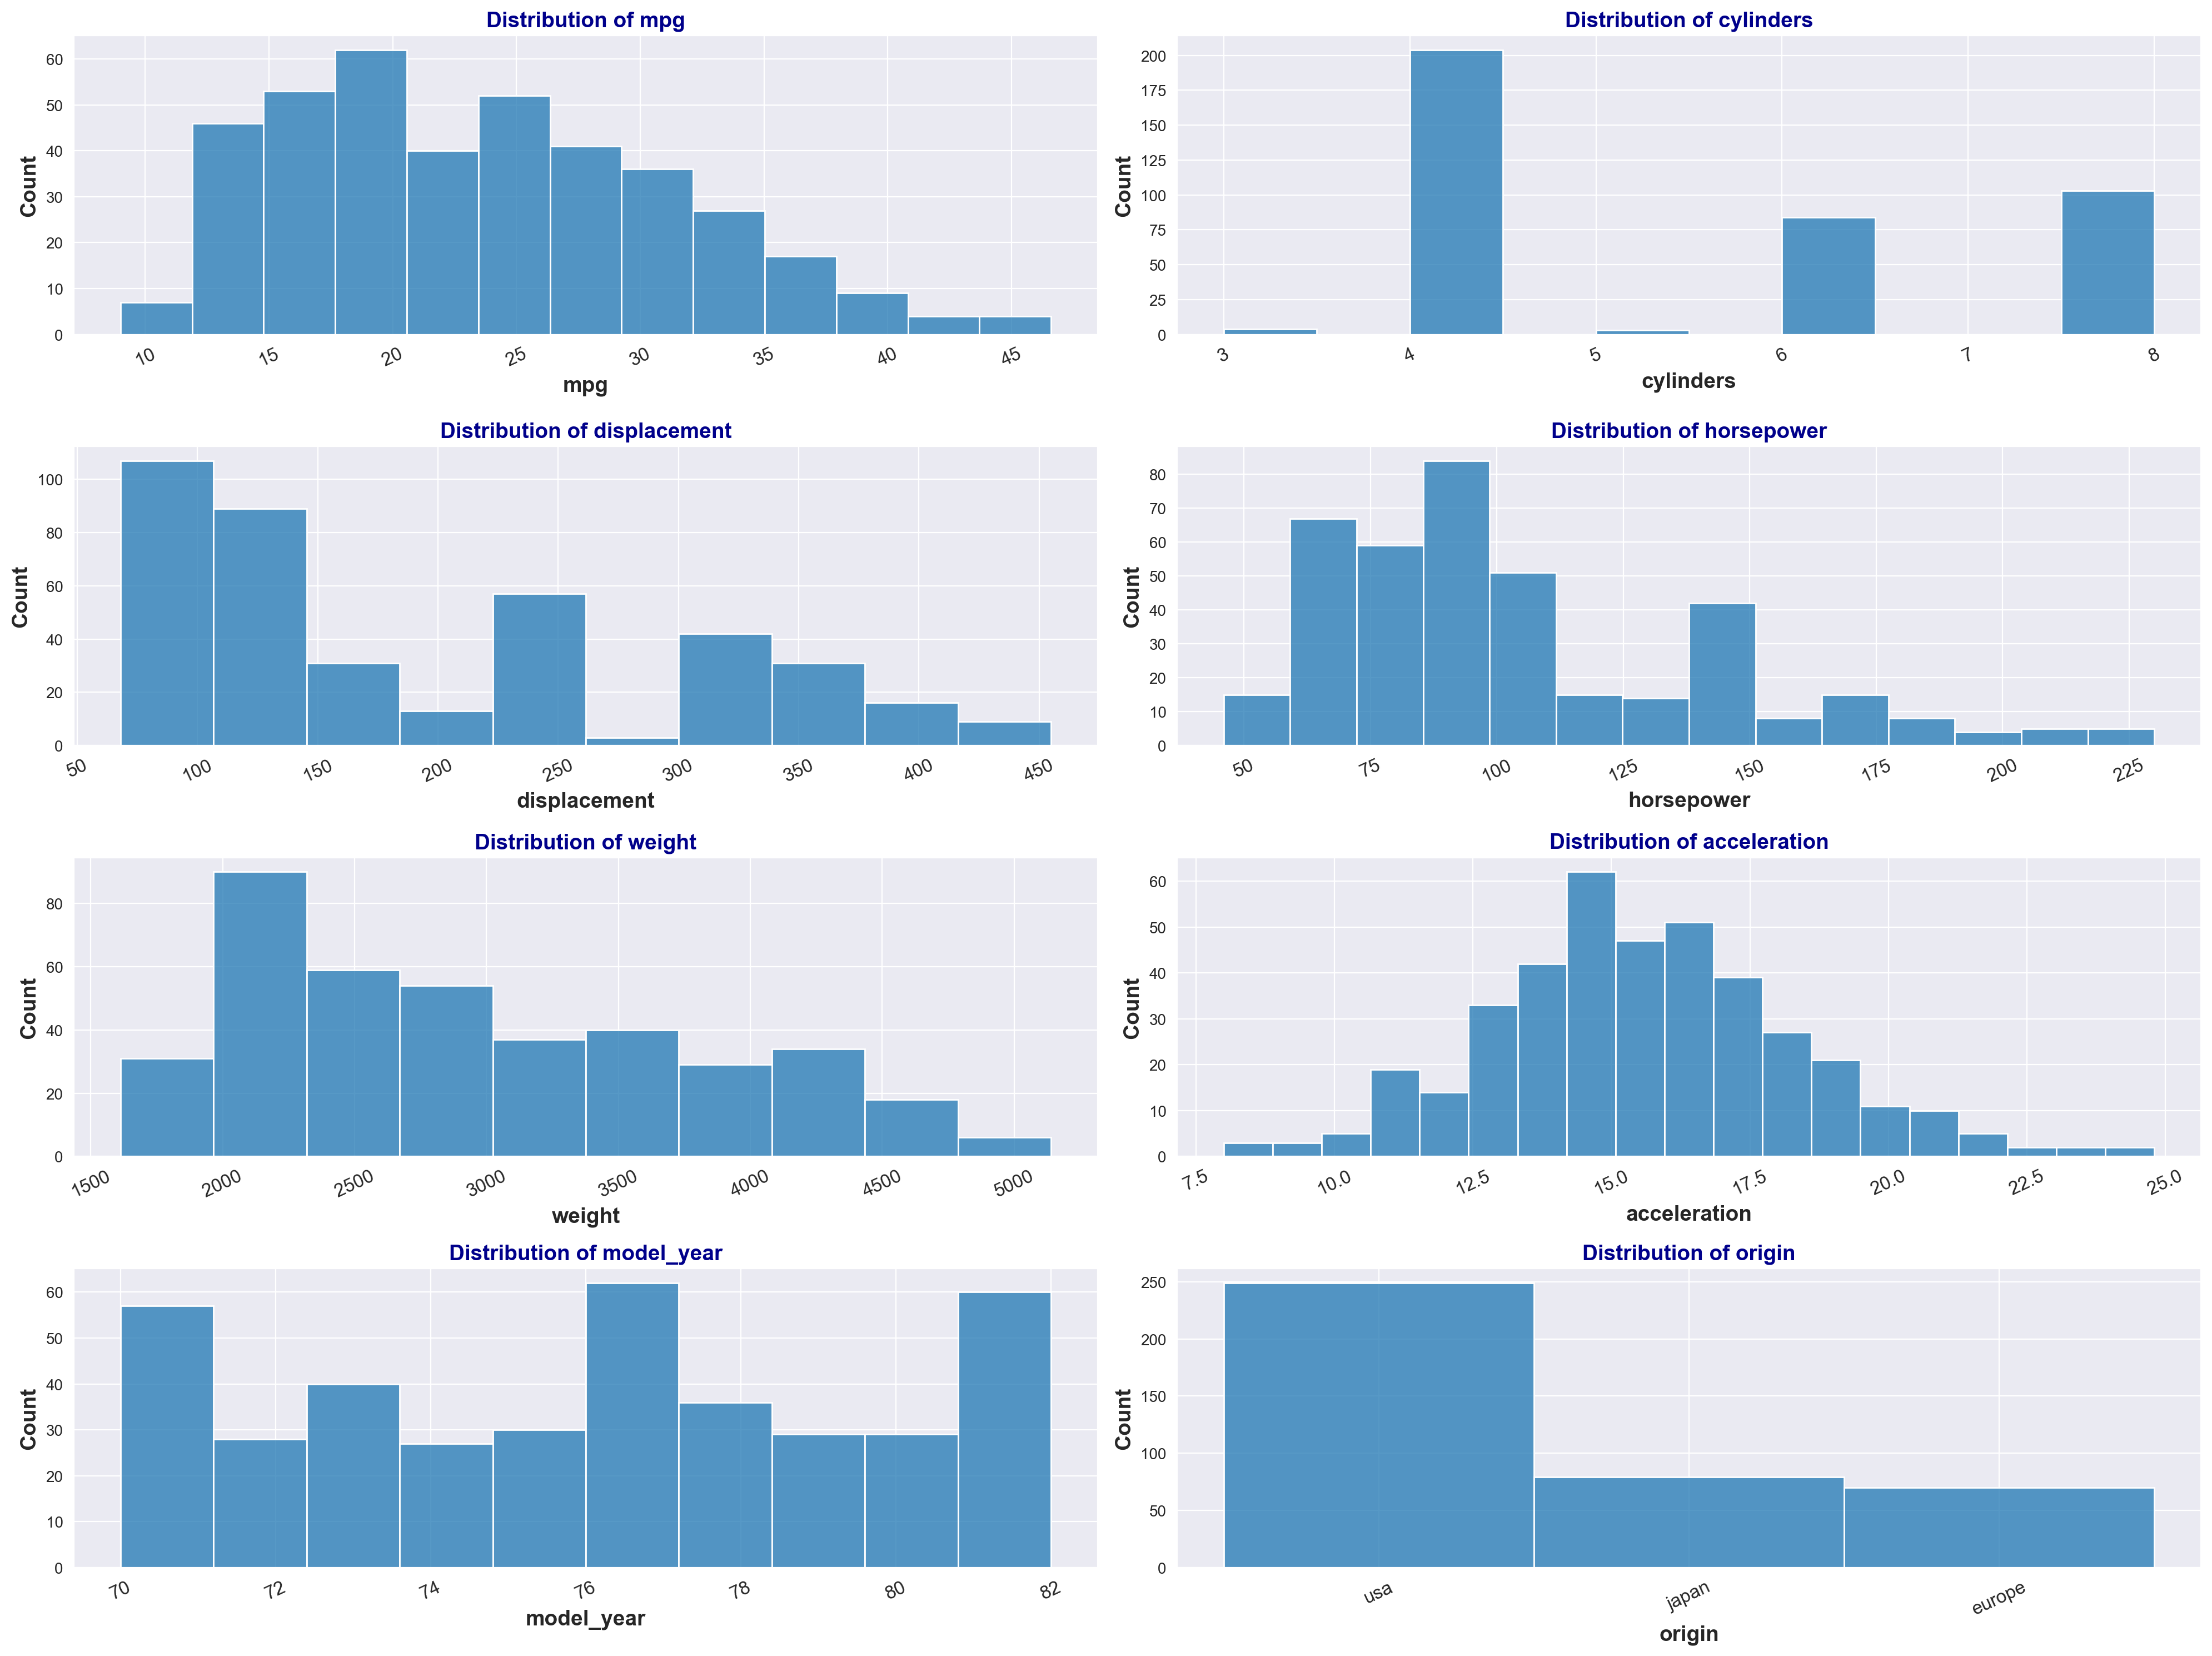

In [2636]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15), dpi=200)
sns.set_style(style="darkgrid")
ax = ax.flatten()
for i, cols in enumerate(df.columns[:]):
    sns.histplot(data=df, x=cols, ax=ax[i])
    ax[i].set_title(
        f"Distribution of {cols}", fontsize=14, fontweight="bold", color="darkblue"
    )

    ax[i].set_xlabel(cols, fontweight="bold", fontsize=14)

    ax[i].set_ylabel("Count", fontweight="bold", fontsize=14)
    ax[i].tick_params(axis="x", rotation=25, labelsize=12)

plt.tight_layout()
plt.show()

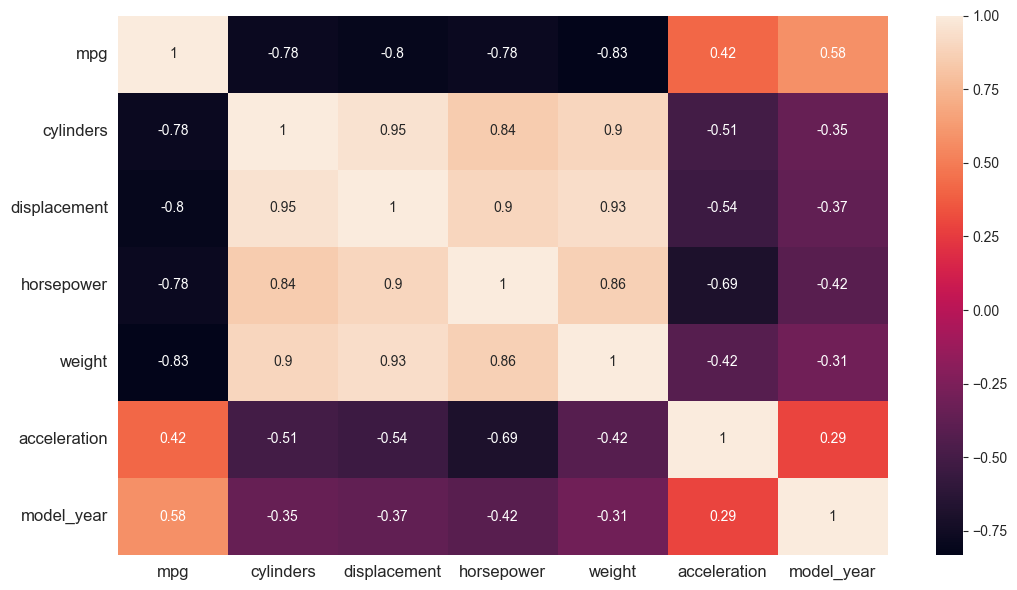

In [2637]:
plt.figure(figsize=(11, 6), dpi=100)
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.tick_params(axis="both", labelsize=12)
plt.tight_layout()
plt.show()

weight > displacement > horsepower > cylinders > acceleration

In [2638]:
df.dropna(inplace=True)

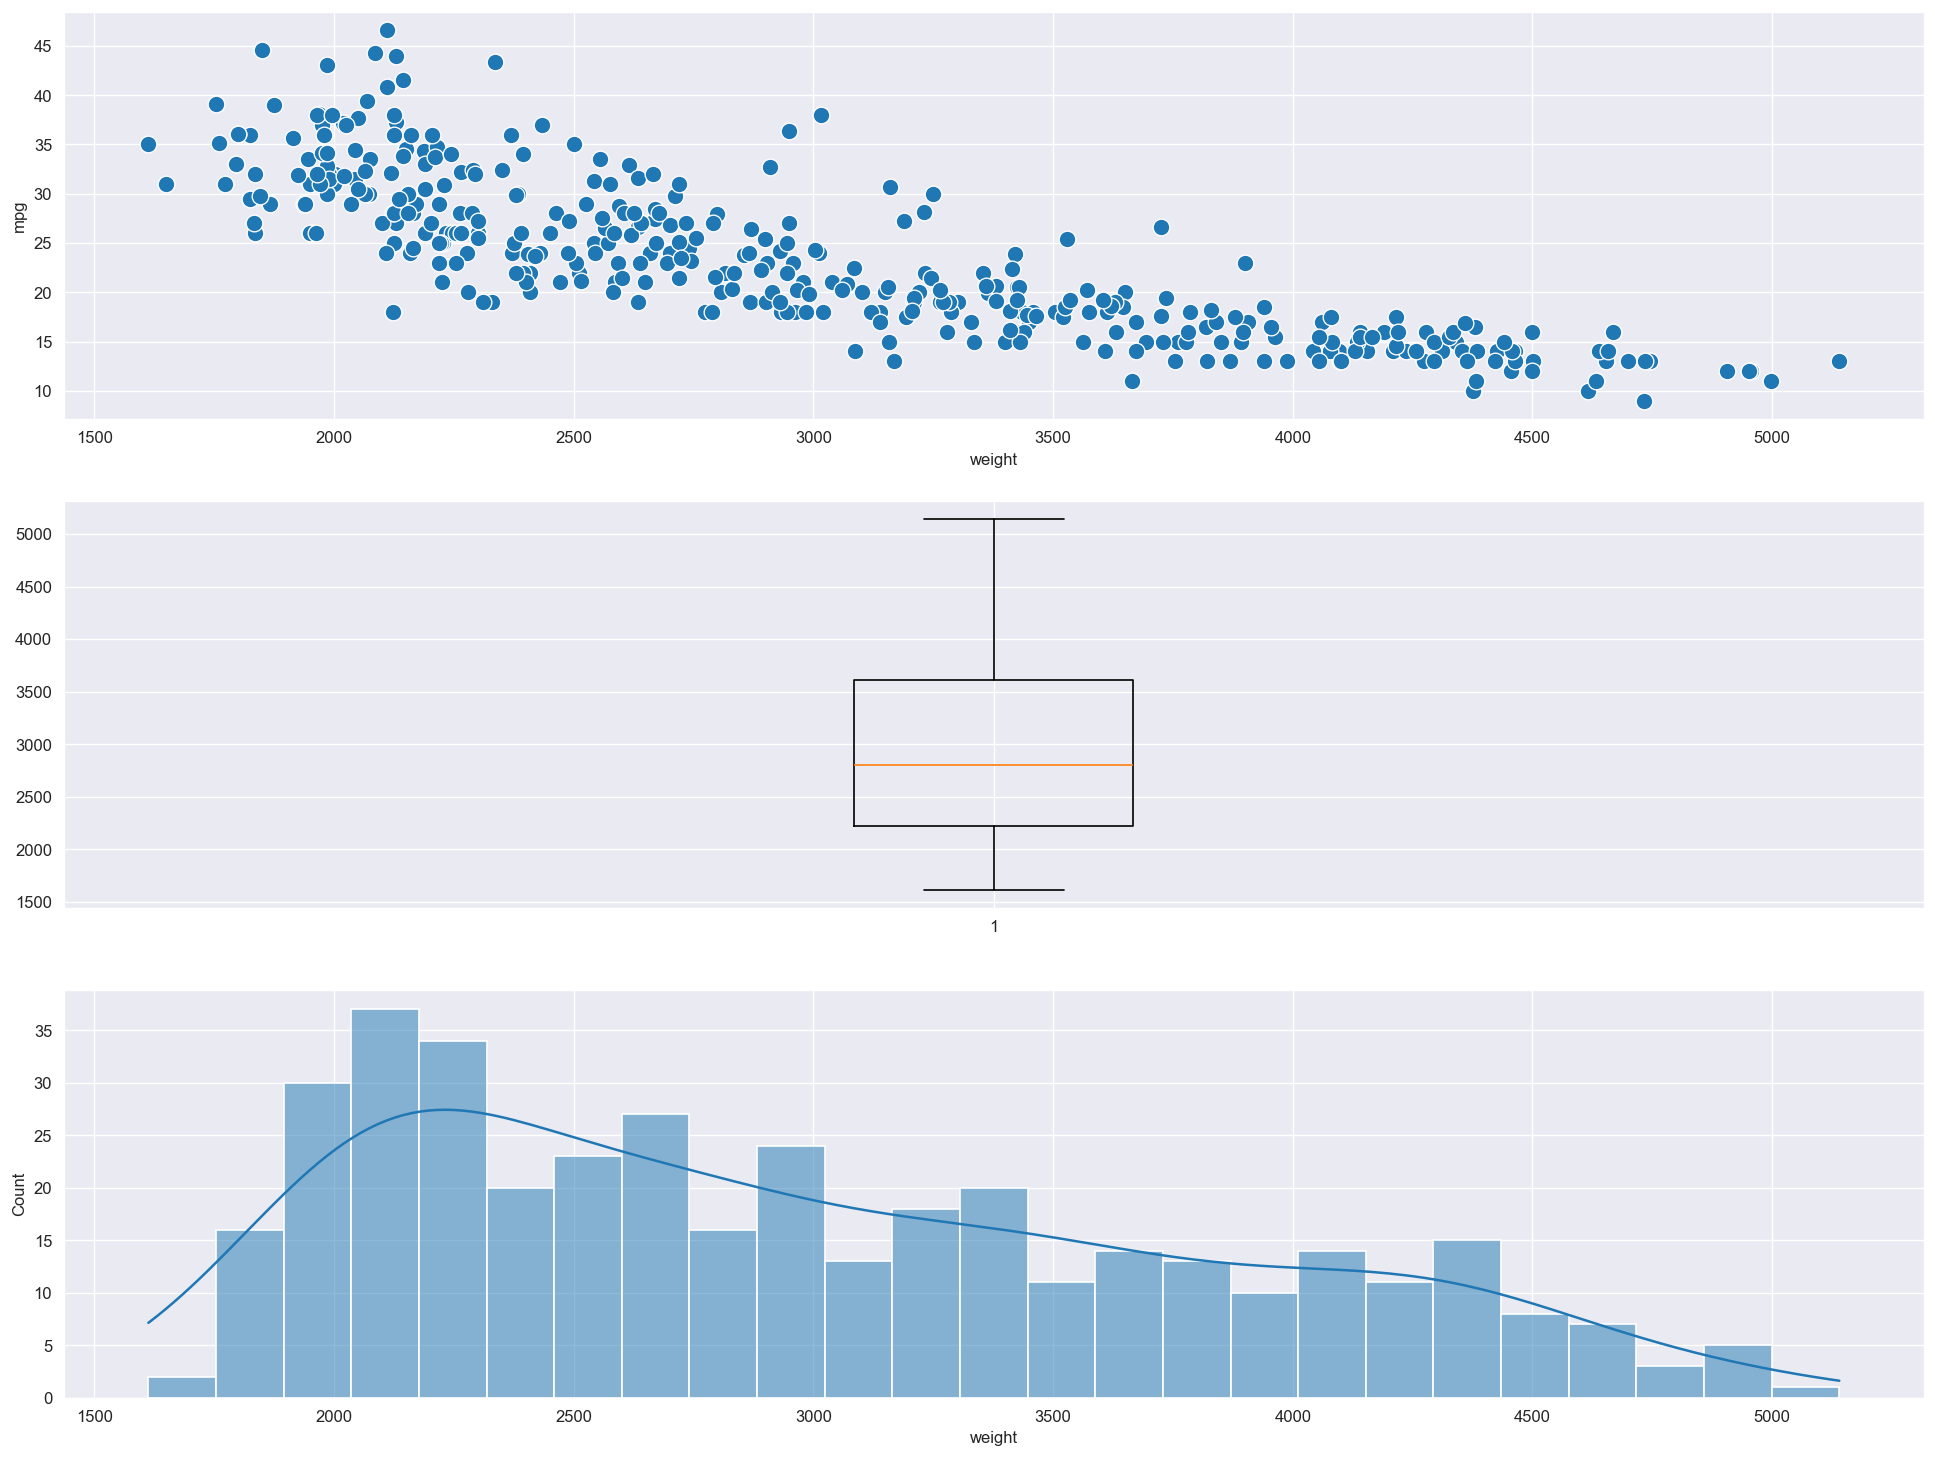

In [2639]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 15), dpi=120)
sns.scatterplot(data=df, x="weight", y="mpg", ax=ax[0], s=100)
ax[1].boxplot(x=df["weight"])
sns.histplot(data=df, x="weight", ax=ax[2], bins=25, kde=True)
plt.show()

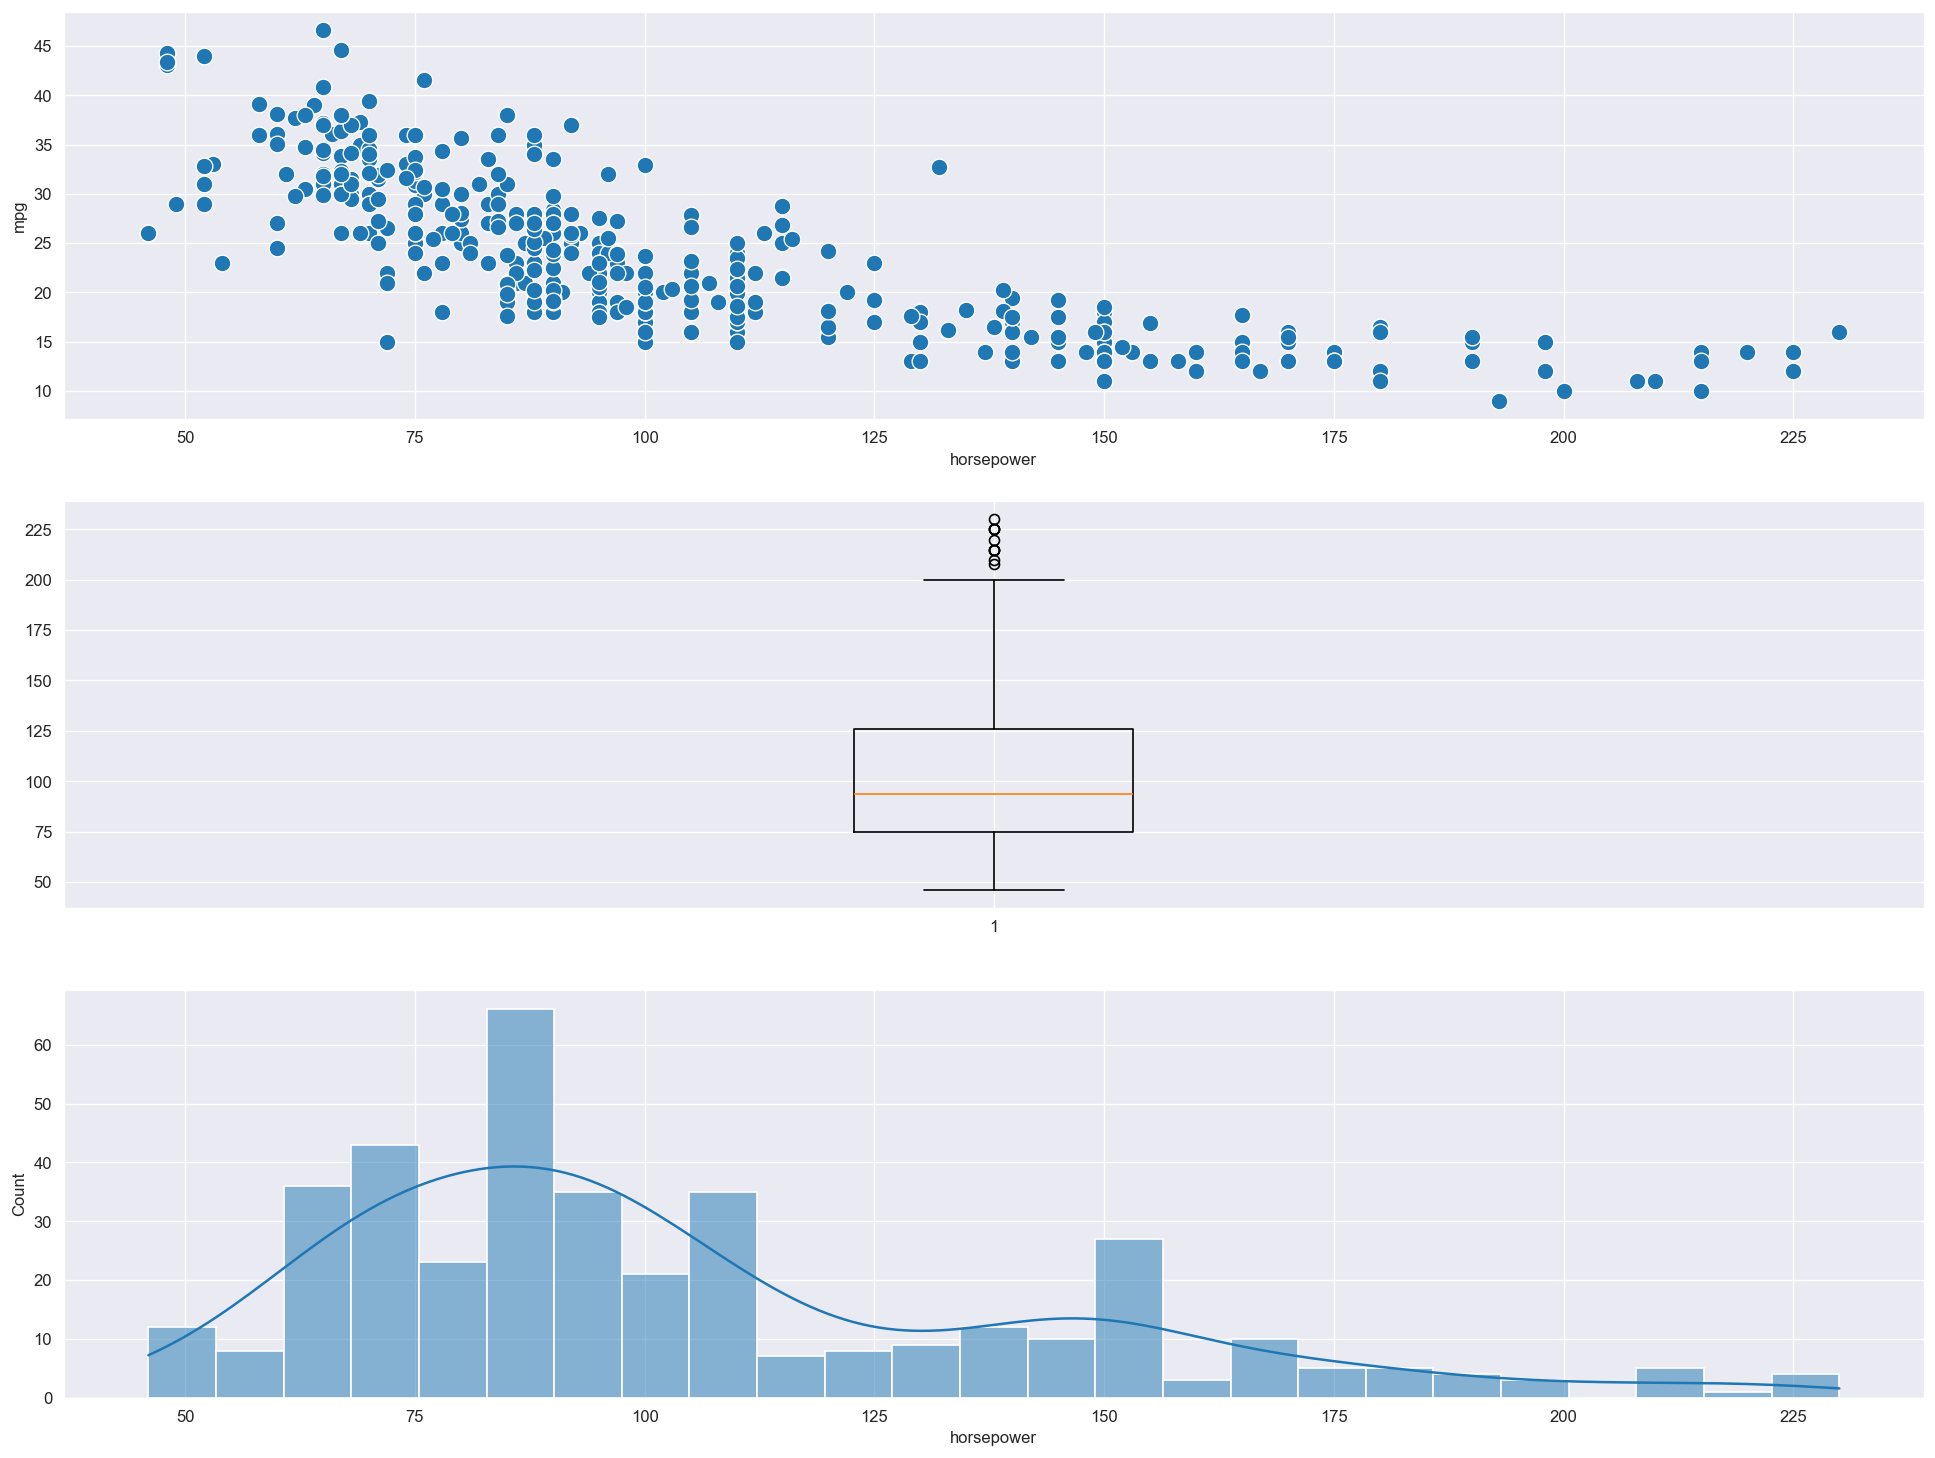

In [2640]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 15), dpi=120)
sns.scatterplot(data=df, x="horsepower", y="mpg", ax=ax[0], s=100)
ax[1].boxplot(x=df["horsepower"])
sns.histplot(data=df, x="horsepower", ax=ax[2], bins=25, kde=True)
plt.show()

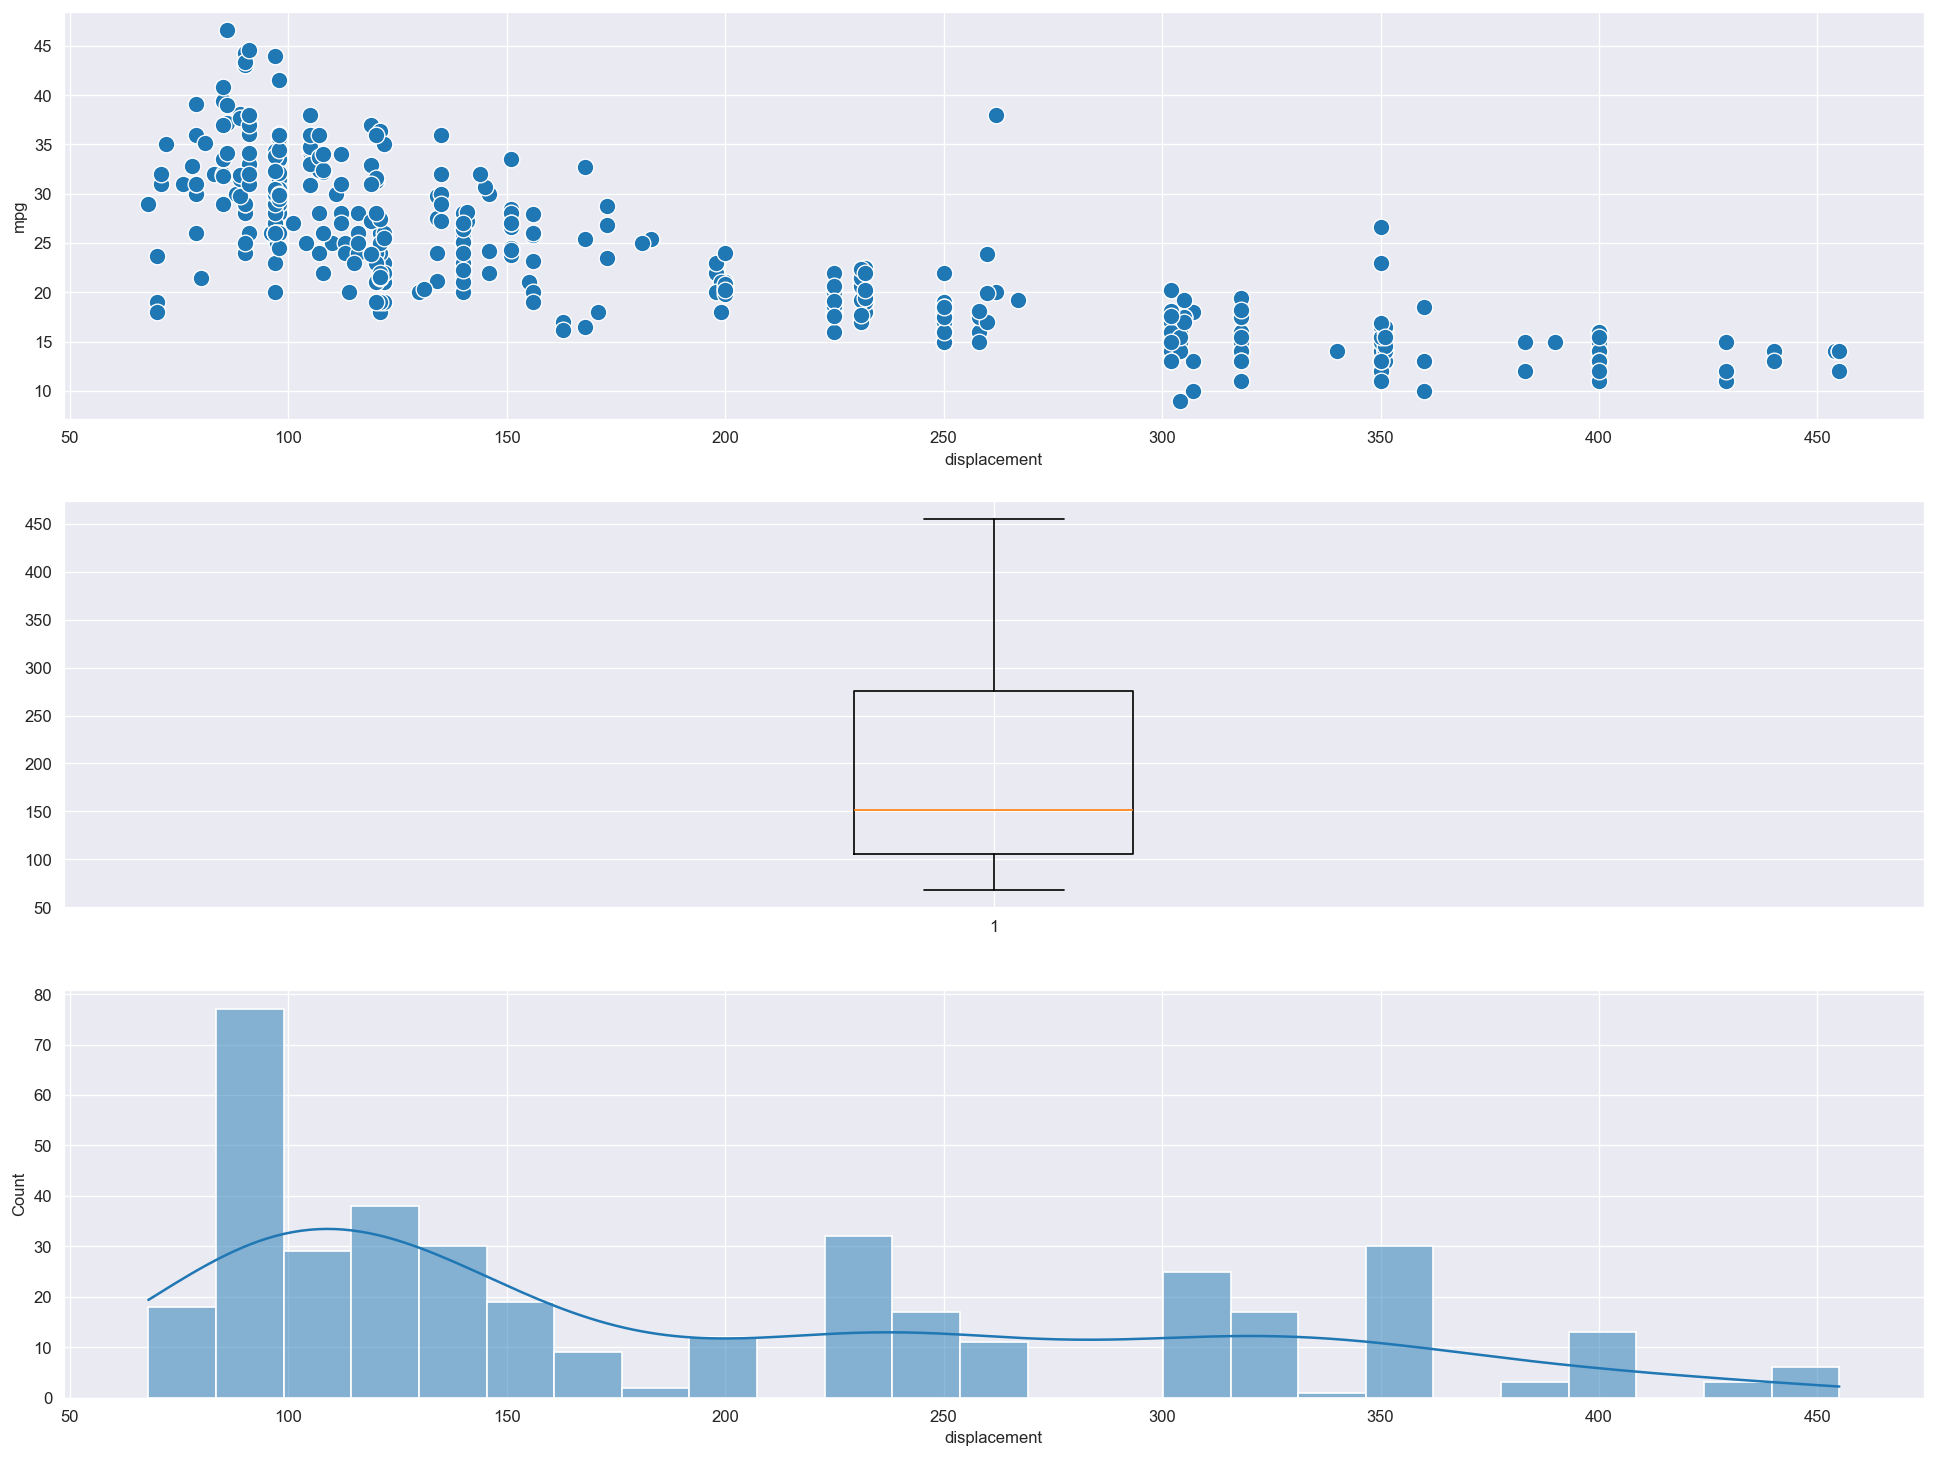

In [2641]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 15), dpi=120)
sns.scatterplot(data=df, x="displacement", y="mpg", ax=ax[0], s=100)
ax[1].boxplot(x=df["displacement"])
sns.histplot(data=df, x="displacement", ax=ax[2], bins=25, kde=True)
plt.show()

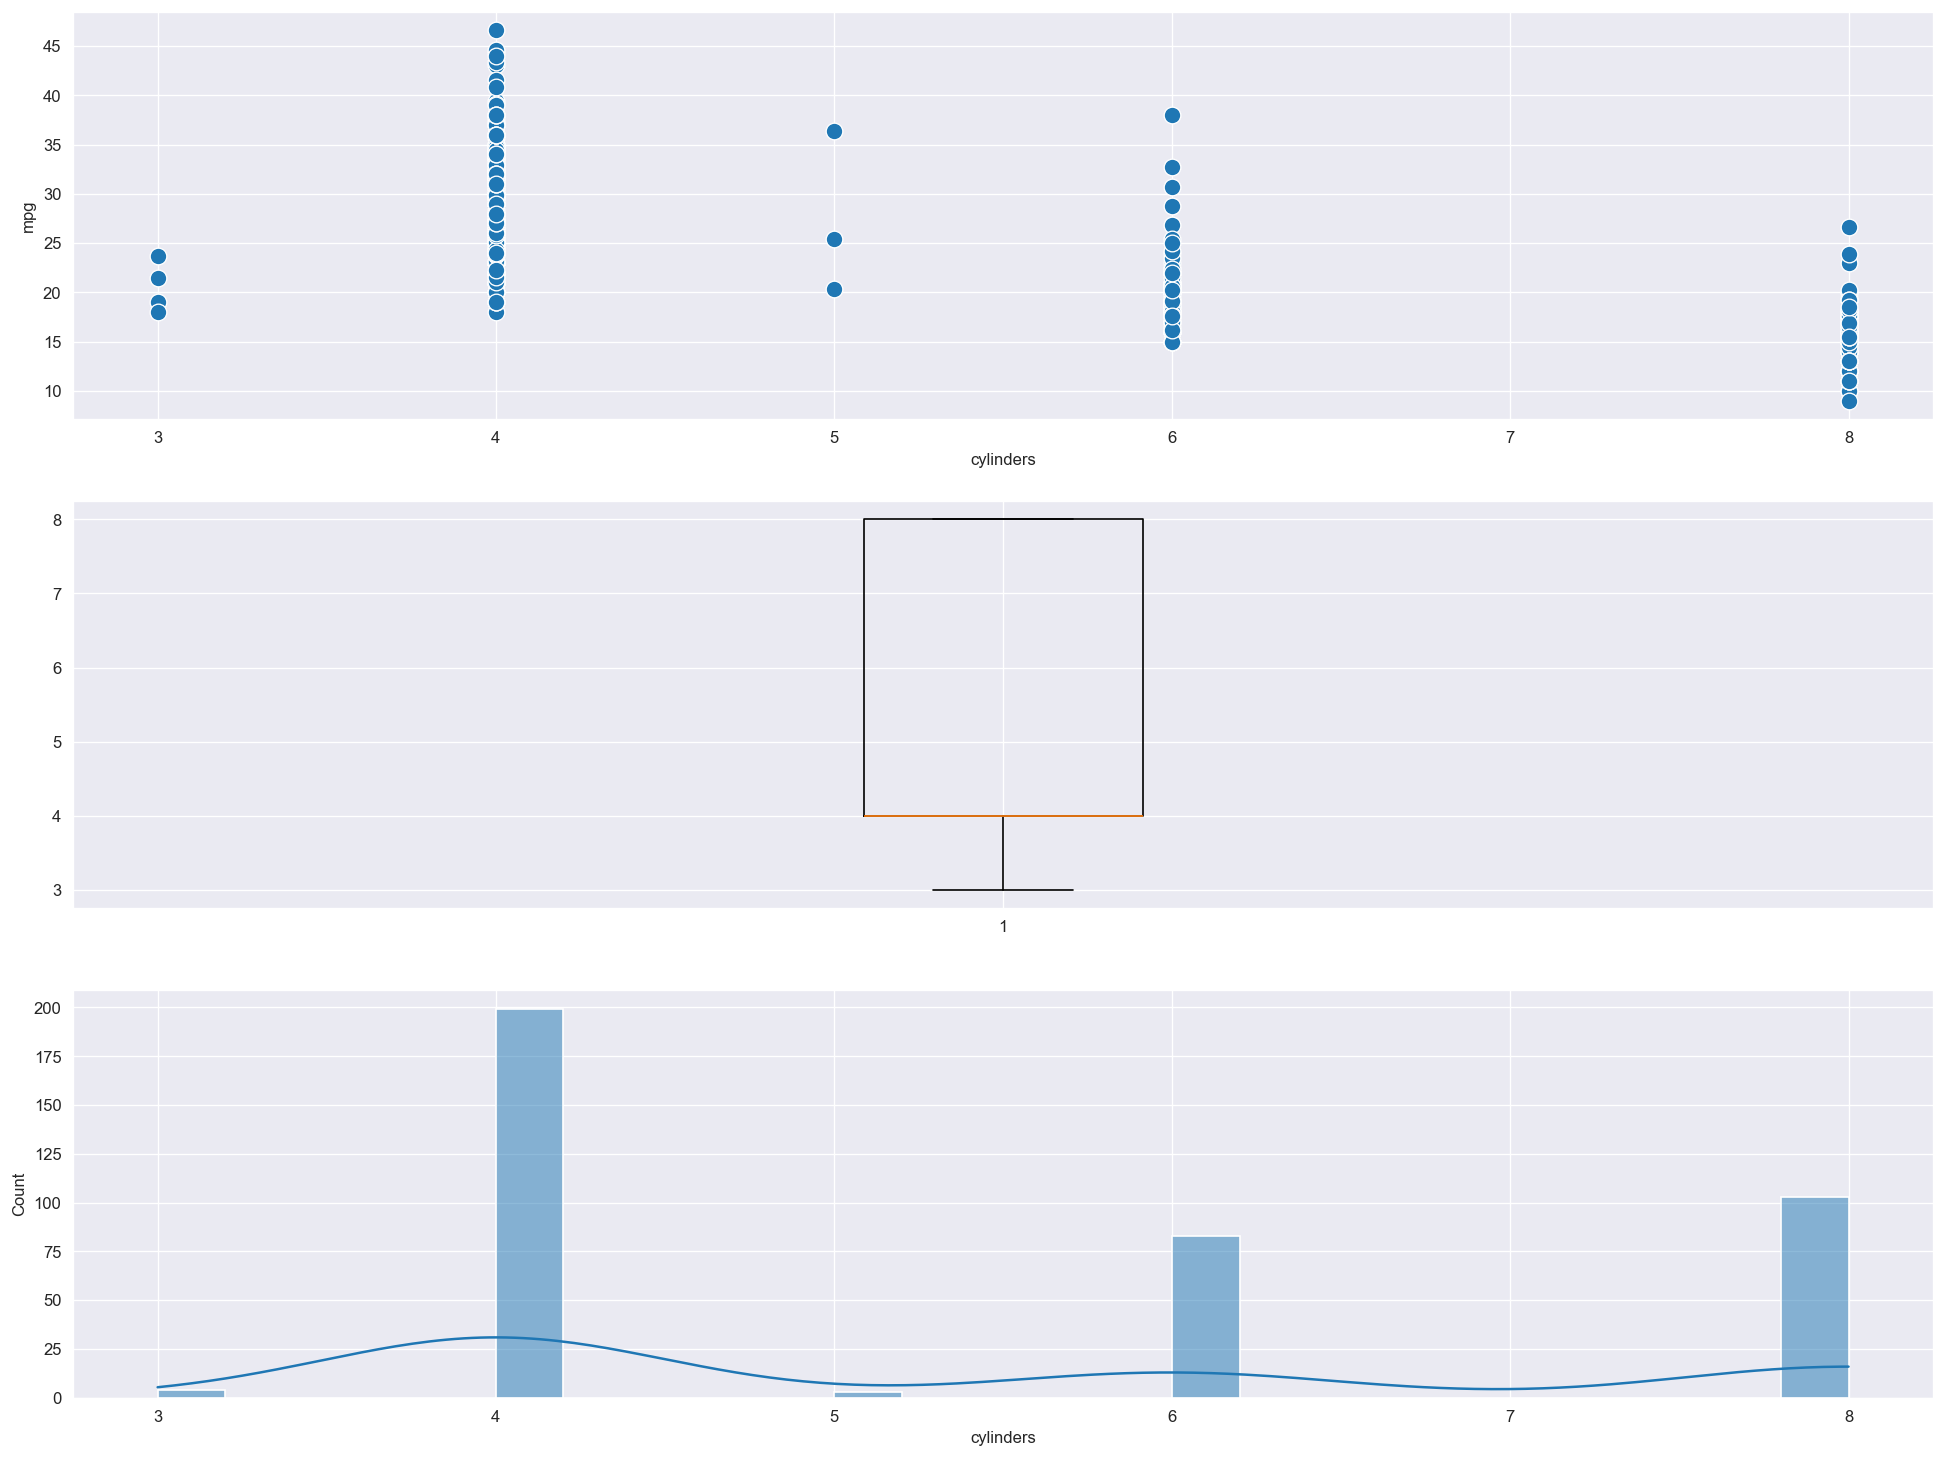

In [2642]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 15), dpi=120)
sns.scatterplot(data=df, x="cylinders", y="mpg", ax=ax[0], s=100)
ax[1].boxplot(x=df["cylinders"])
sns.histplot(data=df, x="cylinders", ax=ax[2], bins=25, kde=True)
plt.show()

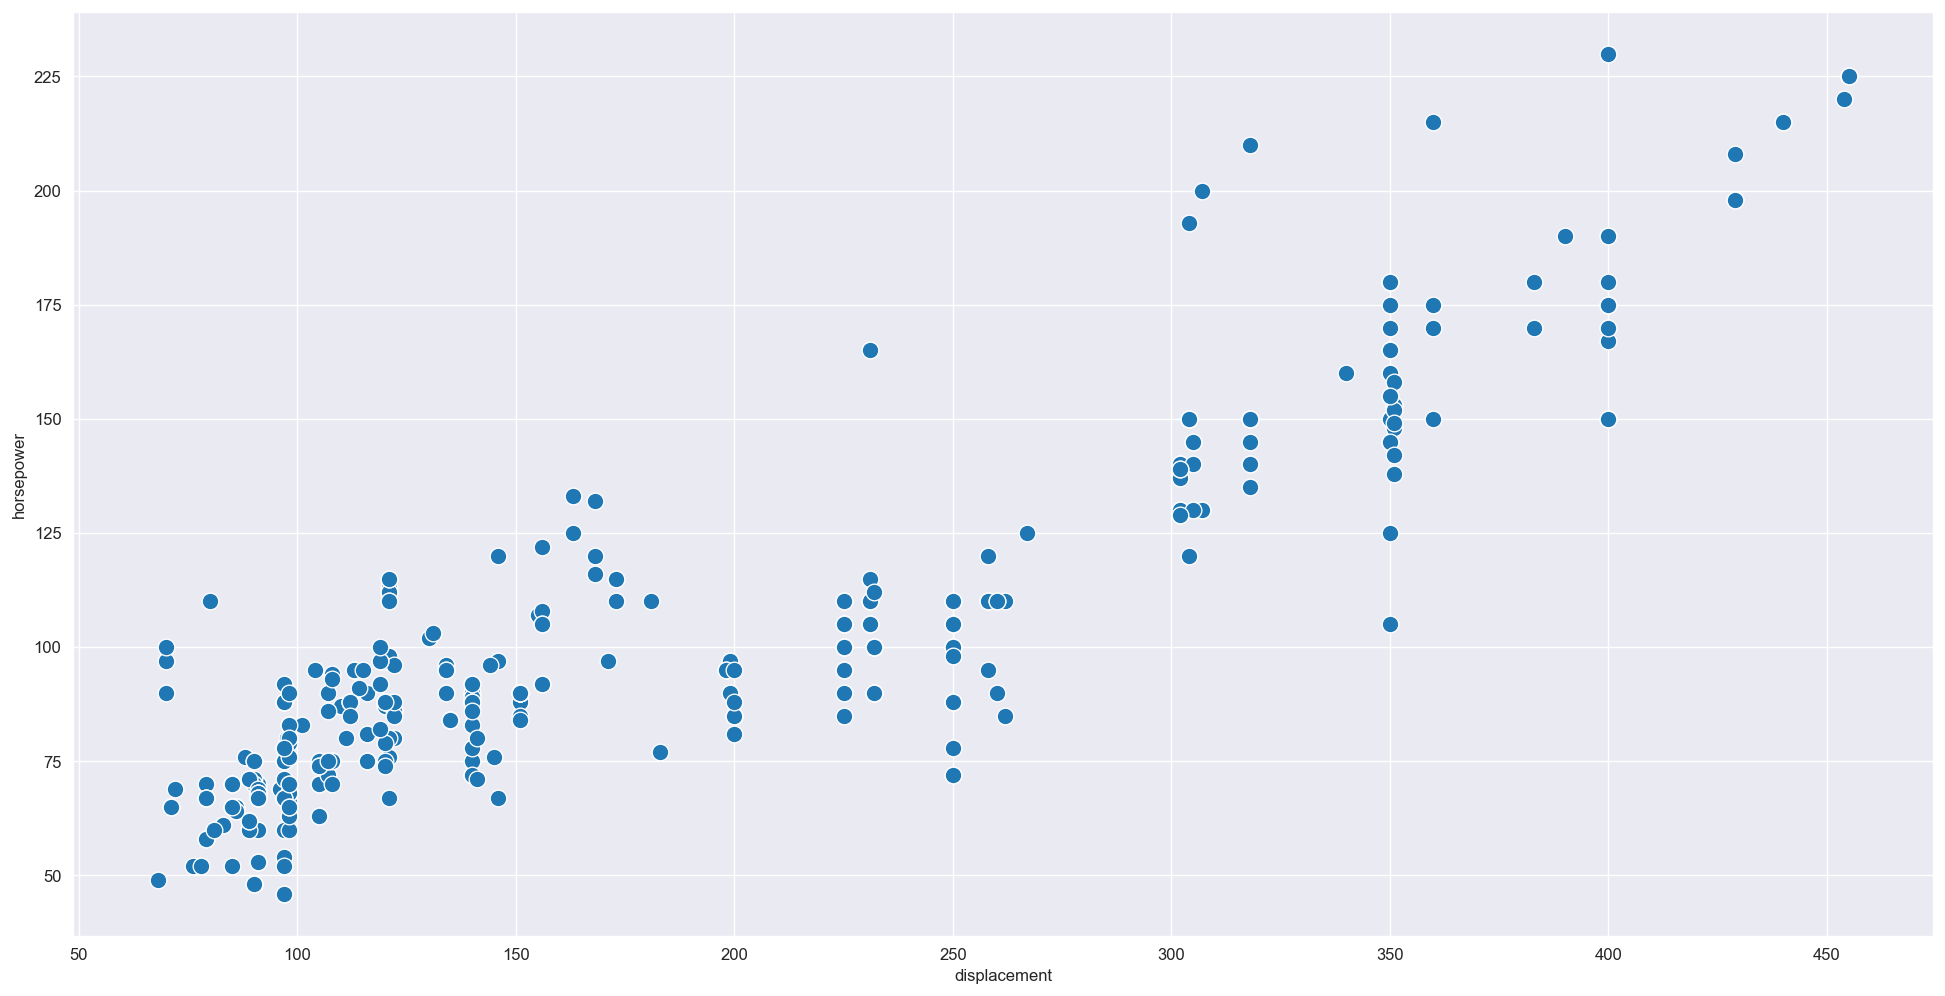

In [2643]:
plt.figure(figsize=(20, 10), dpi=120)
sns.scatterplot(data=df, x=df["displacement"], y=df["horsepower"], s=100)
plt.show()

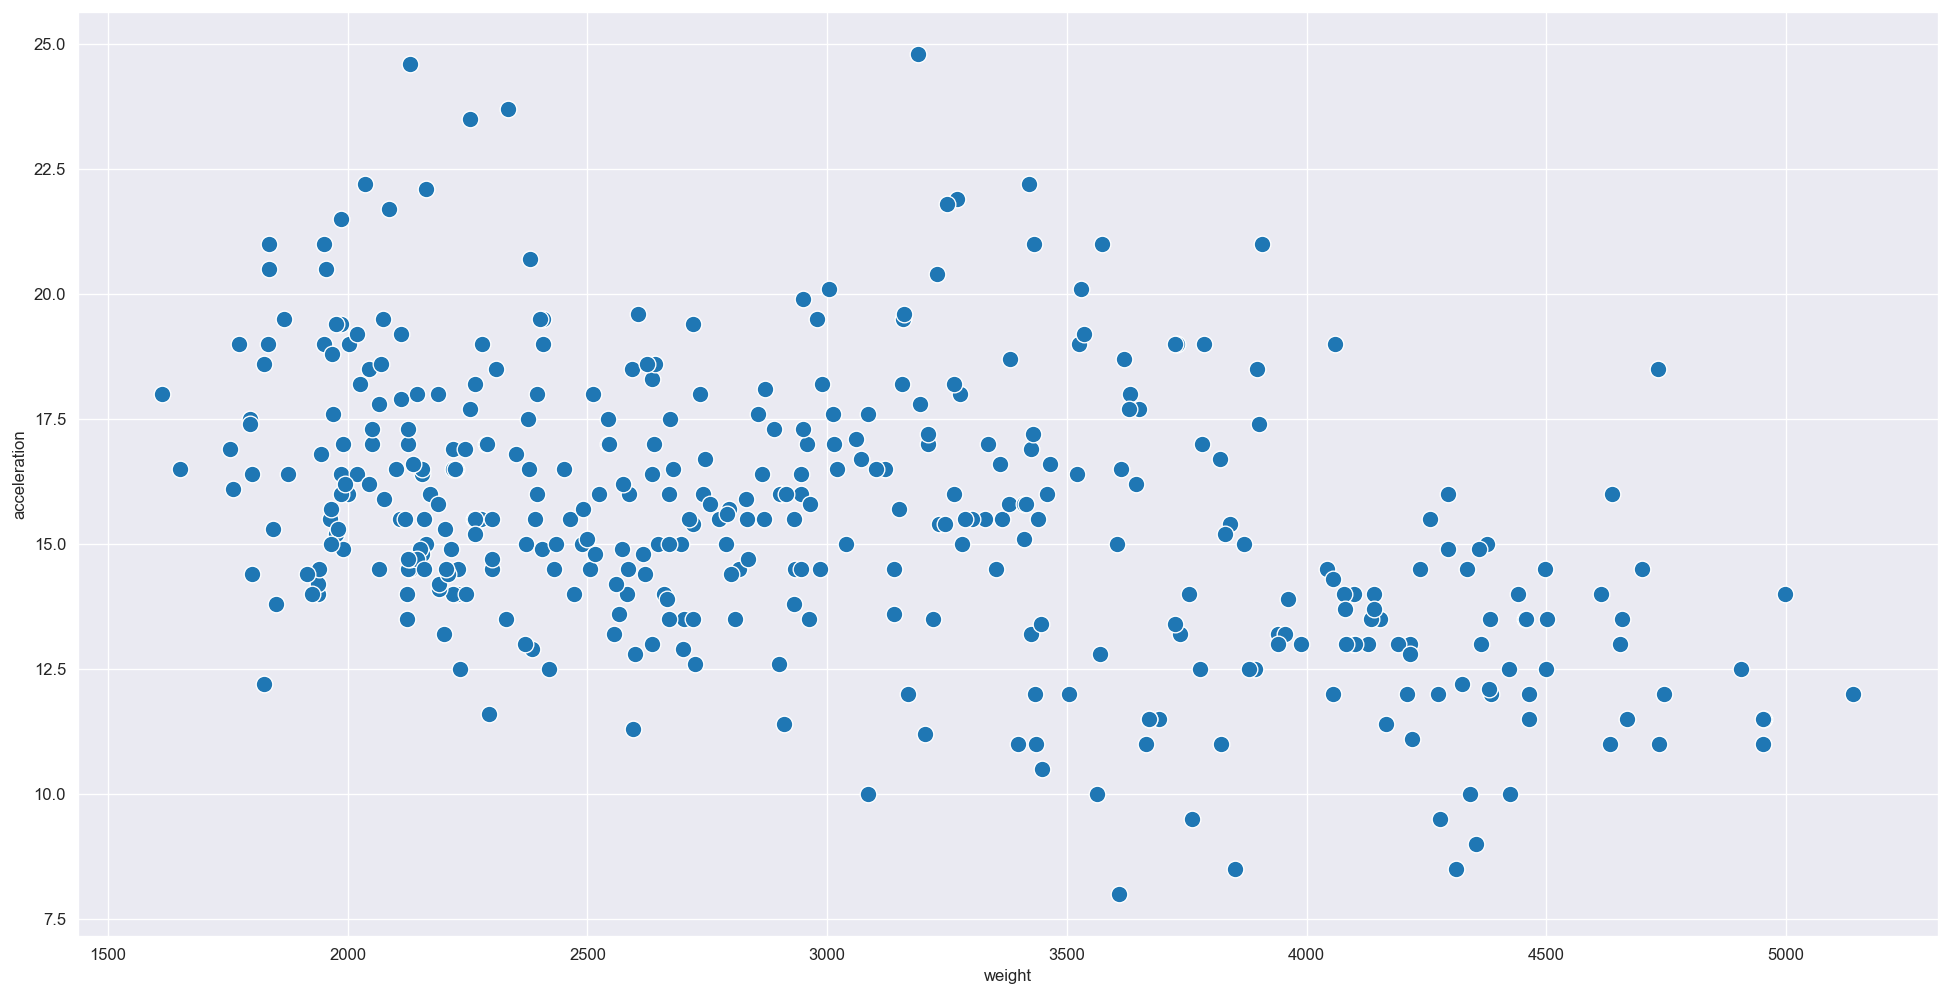

In [2644]:
plt.figure(figsize=(20, 10), dpi=120)
sns.scatterplot(data=df, x=df["weight"], y=df["acceleration"], s=100)
plt.show()

In [2645]:
df.groupby(["cylinders"])["mpg"].mean().sort_values(ascending=False)

cylinders
4    29.283920
5    27.366667
3    20.550000
6    19.973494
8    14.963107
Name: mpg, dtype: float64

<font size=8>
The graph clearly shows that 4-cylinder cars have high fuel efficiency

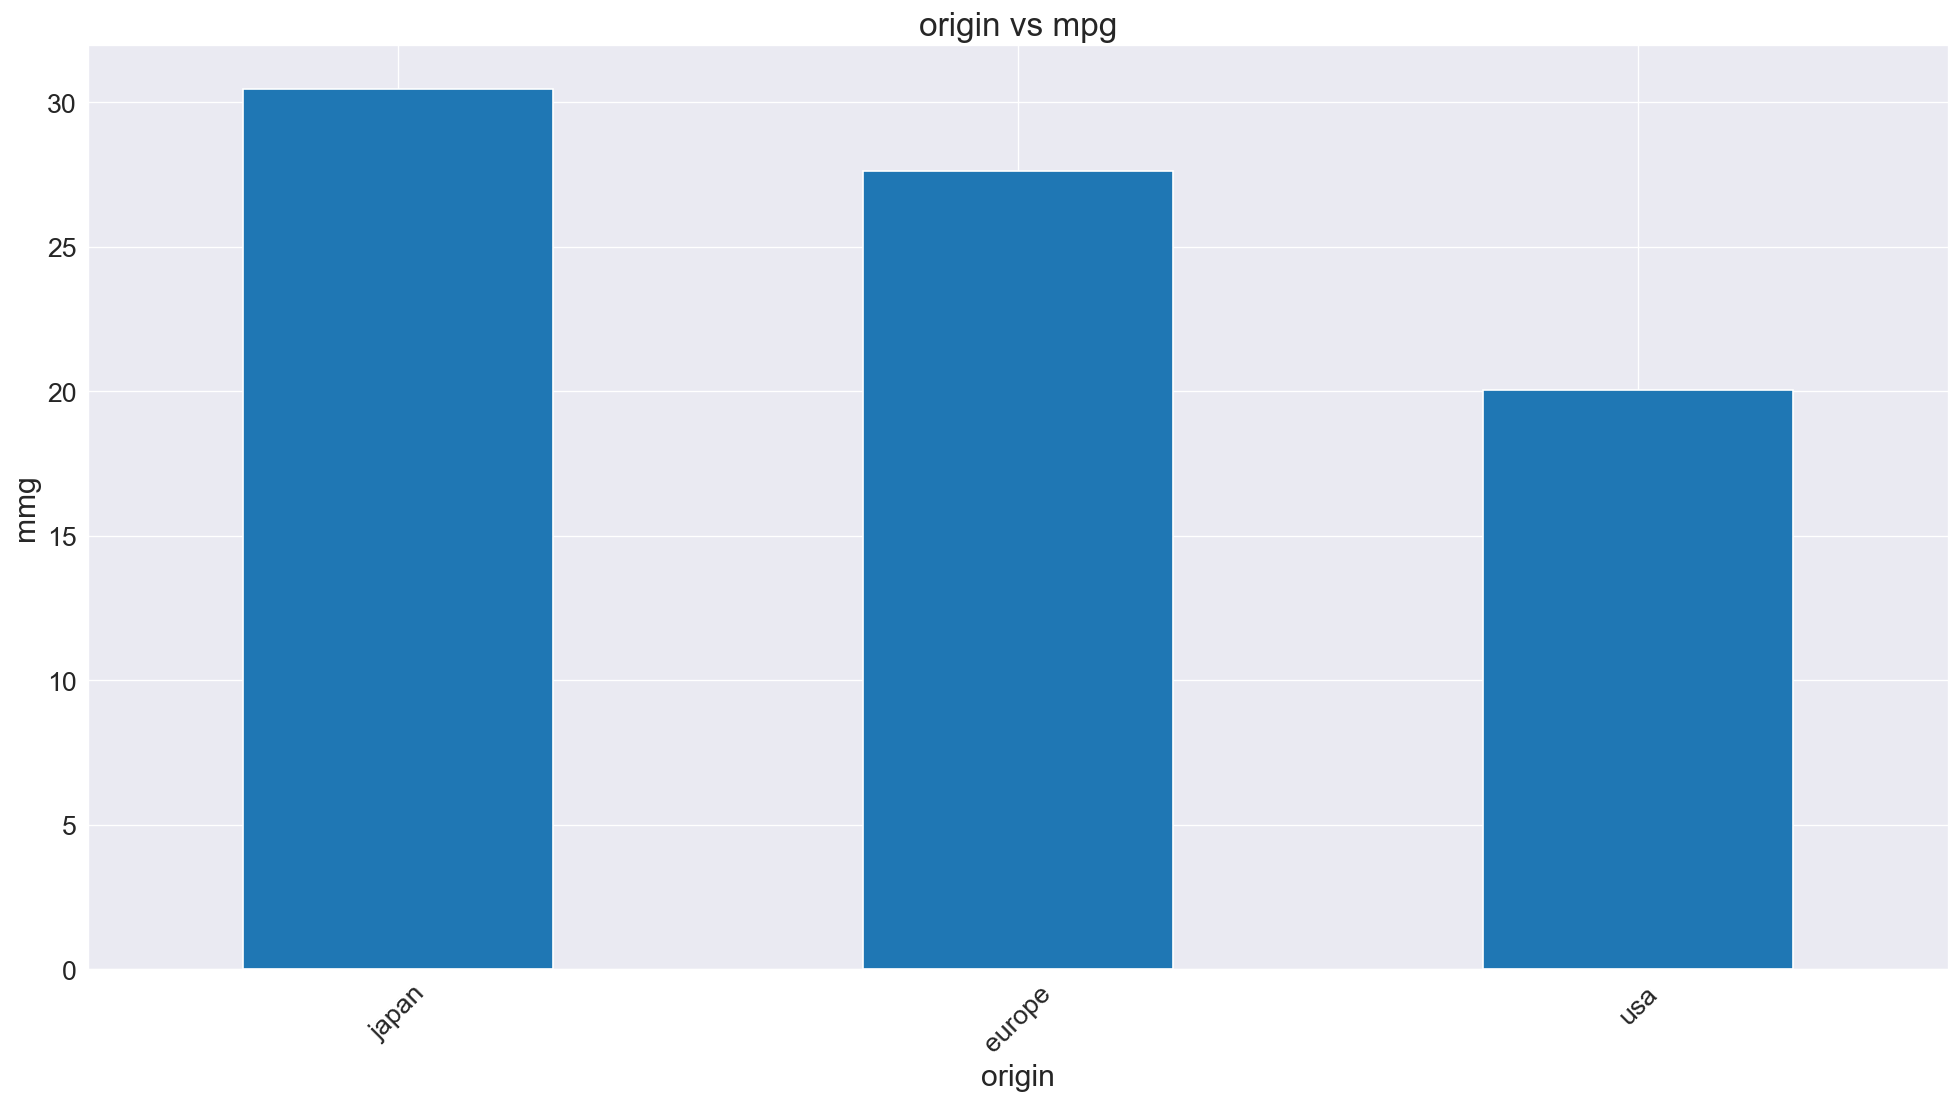

In [2646]:
plt.figure(figsize=(20, 10), dpi=120)
df.groupby(["origin"])["mpg"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("origin vs mpg", fontsize=20)
plt.xlabel("origin", fontsize=18)
plt.ylabel("mmg", fontsize=18)
plt.xticks(rotation=45)
plt.tick_params(axis="both", labelsize=16)
plt.show()

In [2647]:
df.replace({"origin":{"usa": 1, "europe": 2, "japan": 3}}, inplace=True)

In [2648]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [2649]:
x = df.drop(columns=["mpg", "model_year"])
y = df["mpg"]

In [2650]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [2651]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [2652]:
y_pred = model.predict(x_test)

In [2653]:
print(model.coef_)
print(model.intercept_)

[-0.4716099   0.01223514 -0.04657133 -0.00574095  0.09697619  1.08619601]
42.36981757546913


In [2654]:
print(mean_absolute_error(y_test, y_pred))

3.1395995304526347


In [2655]:
print(mean_squared_error(y_test, y_pred))

17.043655459722356


In [2656]:
print(root_mean_squared_error(y_test, y_pred))

4.128396233372271


In [2657]:
print(r2_score(y_test, y_pred))

0.7257892506871746


In [2658]:
cylinders_2 = df["cylinders"] ** 2
df.insert(2, "cylinders_2", cylinders_2)
df

,mpg,cylinders,cylinders_2,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,64,307.0,130.0,3504,12.0,70,1
1,15.0,8,64,350.0,165.0,3693,11.5,70,1
2,18.0,8,64,318.0,150.0,3436,11.0,70,1
3,16.0,8,64,304.0,150.0,3433,12.0,70,1
4,17.0,8,64,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,16,140.0,86.0,2790,15.6,82,1
394,44.0,4,16,97.0,52.0,2130,24.6,82,2
395,32.0,4,16,135.0,84.0,2295,11.6,82,1
396,28.0,4,16,120.0,79.0,2625,18.6,82,1


In [2659]:
x = df.drop(columns=["mpg", "model_year"])
y = df["mpg"]

In [2660]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [2661]:
model_2 = LinearRegression()
model_2.fit(x_train, y_train)

LinearRegression()

In [2662]:
y_pred = model_2.predict(x_test)

In [2663]:
print(model.coef_)
print(model.intercept_)

[-0.4716099   0.01223514 -0.04657133 -0.00574095  0.09697619  1.08619601]
42.36981757546913


In [2664]:
print(r2_score(y_test, y_pred))

0.7329698900753003


In [2665]:
displacement_2 = np.log10(df["displacement"])
df.insert(4, "displacement_2", displacement_2)
df

,mpg,cylinders,cylinders_2,displacement,displacement_2,horsepower,weight,acceleration,model_year,origin
0,18.0,8,64,307.0,2.487138,130.0,3504,12.0,70,1
1,15.0,8,64,350.0,2.544068,165.0,3693,11.5,70,1
2,18.0,8,64,318.0,2.502427,150.0,3436,11.0,70,1
3,16.0,8,64,304.0,2.482874,150.0,3433,12.0,70,1
4,17.0,8,64,302.0,2.480007,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,16,140.0,2.146128,86.0,2790,15.6,82,1
394,44.0,4,16,97.0,1.986772,52.0,2130,24.6,82,2
395,32.0,4,16,135.0,2.130334,84.0,2295,11.6,82,1
396,28.0,4,16,120.0,2.079181,79.0,2625,18.6,82,1


In [2666]:
x = df.drop(columns=["mpg", "model_year"])
y = df["mpg"]

In [2667]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [2668]:
model_3 = LinearRegression()
model_3.fit(x_train, y_train)

LinearRegression()

In [2669]:
y_pred = model_3.predict(x_test)

In [2670]:
print(model.coef_)
print(model.intercept_)

[-0.4716099   0.01223514 -0.04657133 -0.00574095  0.09697619  1.08619601]
42.36981757546913


In [2671]:
print(r2_score(y_test, y_pred))

0.7433575701771515
